In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
from datetime import date

In [41]:
ap_data = pd.read_excel('ap.xlsx', sheet_name = 'AP사용정보')

In [42]:
ap_data.head(5)

,USER_TYPE,AP IP주소,AP가 설치된 건물-층,"위도,경도",AP_TYPE,START_USING_TIME,END_USING_TIME,USAGE_TIME(second),AP_MAC -SHA256해쉬값전환,사용자단말 MAC-SHA256해쉬값전환
0,학생,168.131***,기초특성화과학관-7층,"35.175860, 126.911051",전남대AP,2019-05-01 00:21:43,2019-05-01 01:06:38,2693,qqGqT,1V/2G
1,학생,168.131***,기초특성화과학관-1층,"35.175860, 126.911051",전남대AP,2019-05-01 00:28:32,2019-05-01 00:29:06,34,9REc7,iA07F
2,학생,14.48.1***,명학회관-4층,"35.141651, 126.923151",통신사AP,2019-05-01 01:09:34,2019-05-01 01:12:17,162,LbvpW,MJj9o
3,학생,14.48.1***,명학회관-4층,"35.141651, 126.923151",통신사AP,2019-05-01 01:17:53,2019-05-01 04:34:40,11807,zx3M1,WrRdn
4,학생,14.48.1***,공대2호관-1층,"35.179150, 126.908886",통신사AP,2019-05-01 02:09:29,2019-05-01 02:09:40,12,8F90p,fK5jO


In [43]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55884 entries, 0 to 55883
Data columns (total 10 columns):
USER_TYPE                55884 non-null object
AP IP주소                  55884 non-null object
AP가 설치된 건물-층             55883 non-null object
위도,경도                    55884 non-null object
AP_TYPE                  55884 non-null object
START_USING_TIME         55884 non-null datetime64[ns]
END_USING_TIME           55646 non-null datetime64[ns]
USAGE_TIME(second)       55884 non-null int64
AP_MAC -SHA256해쉬값전환      55884 non-null object
사용자단말 MAC-SHA256해쉬값전환    55884 non-null object
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 4.3+ MB


In [44]:
ap_table = ap_data[['AP가 설치된 건물-층','START_USING_TIME','USAGE_TIME(second)']]
ap_table.head(5)

,AP가 설치된 건물-층,START_USING_TIME,USAGE_TIME(second)
0,기초특성화과학관-7층,2019-05-01 00:21:43,2693
1,기초특성화과학관-1층,2019-05-01 00:28:32,34
2,명학회관-4층,2019-05-01 01:09:34,162
3,명학회관-4층,2019-05-01 01:17:53,11807
4,공대2호관-1층,2019-05-01 02:09:29,12


In [45]:
ap_table = ap_table.loc[(ap_table['AP가 설치된 건물-층']=="명학회관-4층")|(ap_table['AP가 설치된 건물-층']=="명학회관-3층"),:]
ap_table.head(5)

,AP가 설치된 건물-층,START_USING_TIME,USAGE_TIME(second)
2,명학회관-4층,2019-05-01 01:09:34,162
3,명학회관-4층,2019-05-01 01:17:53,11807
5,명학회관-4층,2019-05-01 02:56:39,25
7,명학회관-4층,2019-05-01 04:16:53,12745
9,명학회관-4층,2019-05-01 04:59:25,13727


In [46]:
ap_table['USAGE_TIME'] = ap_table['USAGE_TIME(second)']
ap_table.head(5)

,AP가 설치된 건물-층,START_USING_TIME,USAGE_TIME(second),USAGE_TIME
2,명학회관-4층,2019-05-01 01:09:34,162,162
3,명학회관-4층,2019-05-01 01:17:53,11807,11807
5,명학회관-4층,2019-05-01 02:56:39,25,25
7,명학회관-4층,2019-05-01 04:16:53,12745,12745
9,명학회관-4층,2019-05-01 04:59:25,13727,13727


In [47]:

ap_table = ap_table.drop(['USAGE_TIME(second)'], axis = 1)
ap_table.head(5)


,AP가 설치된 건물-층,START_USING_TIME,USAGE_TIME
2,명학회관-4층,2019-05-01 01:09:34,162
3,명학회관-4층,2019-05-01 01:17:53,11807
5,명학회관-4층,2019-05-01 02:56:39,25
7,명학회관-4층,2019-05-01 04:16:53,12745
9,명학회관-4층,2019-05-01 04:59:25,13727


In [48]:
ap_table['week'] = ap_table['START_USING_TIME'].dt.day_name()
ap_table.head(5)

,AP가 설치된 건물-층,START_USING_TIME,USAGE_TIME,week
2,명학회관-4층,2019-05-01 01:09:34,162,Wednesday
3,명학회관-4층,2019-05-01 01:17:53,11807,Wednesday
5,명학회관-4층,2019-05-01 02:56:39,25,Wednesday
7,명학회관-4층,2019-05-01 04:16:53,12745,Wednesday
9,명학회관-4층,2019-05-01 04:59:25,13727,Wednesday


In [49]:
ap_table['USAGE_TIME'] = ap_table['USAGE_TIME']/60
ap_table.head(10)

,AP가 설치된 건물-층,START_USING_TIME,USAGE_TIME,week
2,명학회관-4층,2019-05-01 01:09:34,2.700000,Wednesday
3,명학회관-4층,2019-05-01 01:17:53,196.783333,Wednesday
5,명학회관-4층,2019-05-01 02:56:39,0.416667,Wednesday
7,명학회관-4층,2019-05-01 04:16:53,212.416667,Wednesday
9,명학회관-4층,2019-05-01 04:59:25,228.783333,Wednesday
13,명학회관-4층,2019-05-01 08:09:47,0.216667,Wednesday
14,명학회관-3층,2019-05-01 08:09:58,5.083333,Wednesday
15,명학회관-4층,2019-05-01 08:10:01,543.716667,Wednesday
30,명학회관-4층,2019-05-01 08:52:34,0.000000,Wednesday
31,명학회관-4층,2019-05-01 08:52:35,5.616667,Wednesday


In [50]:
ap_table['USAGE_TIME'].describe()

count    12973.000000
mean        34.938231
std        147.518546
min          0.000000
25%          0.500000
50%          5.316667
75%          9.816667
max       4080.583333
Name: USAGE_TIME, dtype: float64

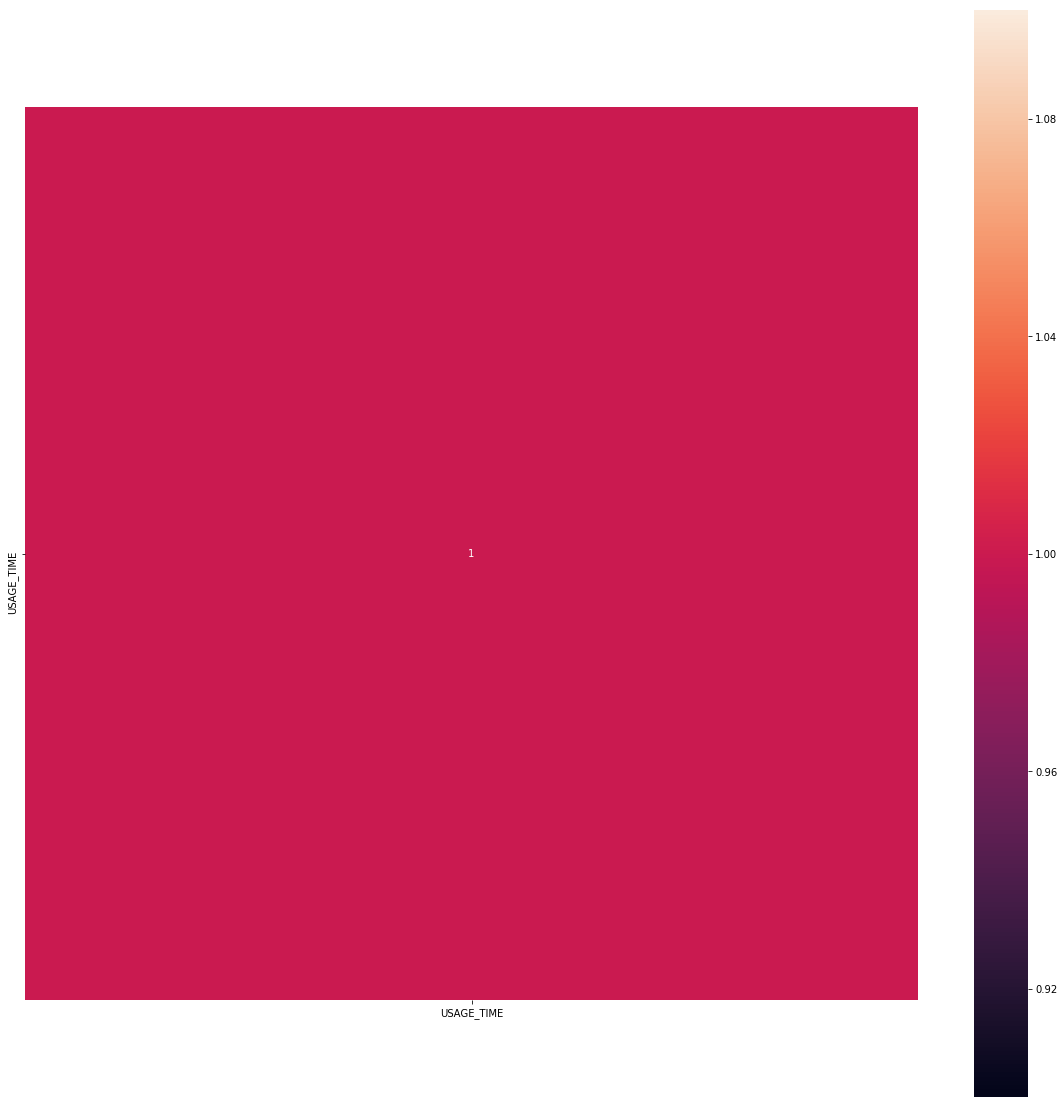

In [66]:
from sklearn.ensemble import RandomForestRegressor

usagetime = ap_table[ap_table['']]

In [53]:
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

In [65]:

#ap_table['USAGE_TIME'].astype('float')
DF = ap_table['USAGE_TIME']
outlier_detector = EllipticEnvelope(contamination=.1)
outlier_detector.fit(DF)


ValueError: Expected 2D array, got 1D array instead:
array=[2.70000000e+00 1.96783333e+02 4.16666667e-01 ... 2.49833333e+01
 5.04000000e+02 3.65133333e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

KeyboardInterrupt: 

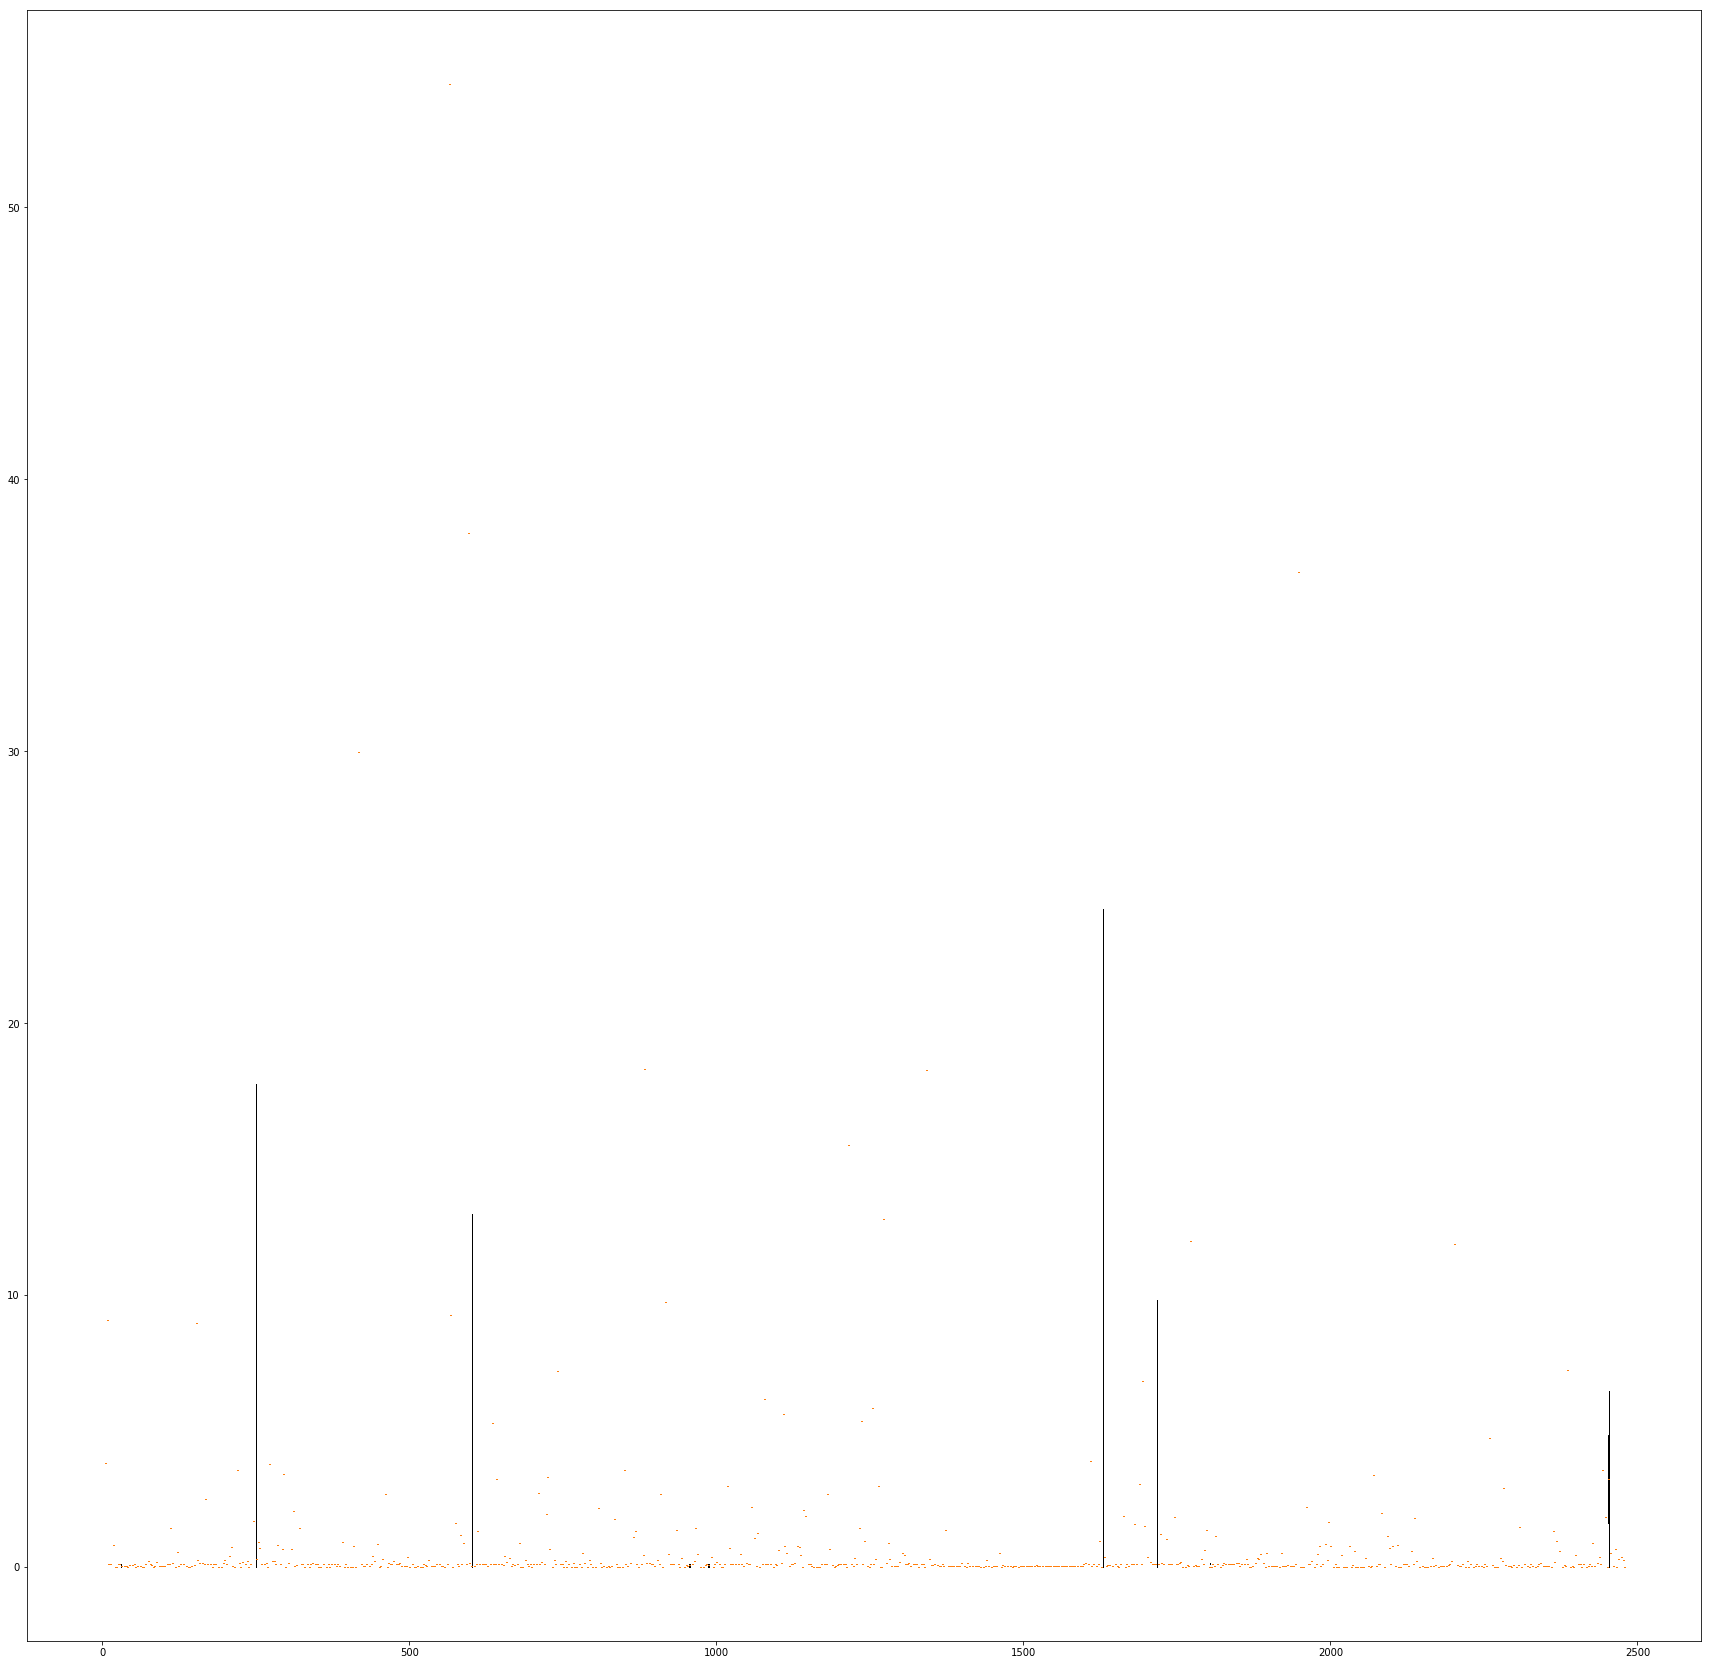

In [15]:
#사용시간 이상치 값 살펴보기
ap_table.boxplot(column=['USAGE_TIME'], by = ['START_USING_TIME','week'], figsize = (30,30), sym = "bo")
plt.show()


In [27]:
# Create a function to count total outliers.
def outliers(variable):
    global filtered # Global keyword is used inside a function only when we want to do assignments or when we want to change a variable.
    
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

In [28]:
outliers(ap_table['USAGE_TIME(second)'])
ap_table.reset_index(drop=True)

Total Outliers of USAGE_TIME(second) : 2274


,AP가 설치된 건물-층,START_USING_TIME,USAGE_TIME(second)
0,명학회관-4층,2019-05-01 01:09:34,162
1,명학회관-4층,2019-05-01 01:17:53,11807
2,명학회관-4층,2019-05-01 02:56:39,25
3,명학회관-4층,2019-05-01 04:16:53,12745
4,명학회관-4층,2019-05-01 04:59:25,13727
5,명학회관-4층,2019-05-01 08:09:47,13
6,명학회관-3층,2019-05-01 08:09:58,305
7,명학회관-4층,2019-05-01 08:10:01,32623
8,명학회관-4층,2019-05-01 08:52:34,0
9,명학회관-4층,2019-05-01 08:52:35,337


In [31]:
ap_table['week'] = ap_table['START_USING_TIME'].dt.day_name()
ap_table.head(5)

,AP가 설치된 건물-층,START_USING_TIME,USAGE_TIME(second),week
2,명학회관-4층,2019-05-01 01:09:34,162,Wednesday
3,명학회관-4층,2019-05-01 01:17:53,11807,Wednesday
5,명학회관-4층,2019-05-01 02:56:39,25,Wednesday
7,명학회관-4층,2019-05-01 04:16:53,12745,Wednesday
9,명학회관-4층,2019-05-01 04:59:25,13727,Wednesday


In [56]:
ap_Monday= ap_table.loc[(ap_table['week']=="Monday"),:]
round(ap_Monday['USAGE_TIME(second)'].mean()/60)

32

In [57]:
ap_Tuesday= ap_table.loc[(ap_table['week']=="Tuesday"),:]
round(ap_Tuesday['USAGE_TIME(second)'].mean()/60)

32

In [58]:
ap_Wednesday= ap_table.loc[(ap_table['week']=="Wednesday"),:]
round(ap_Wednesday['USAGE_TIME(second)'].mean()/60)

34

In [59]:
ap_Thursday = ap_table.loc[(ap_table['week']=="Thursday"),:]
round(ap_Thursday['USAGE_TIME(second)'].mean()/60)

36

In [60]:
ap_Friday = ap_table.loc[(ap_table['week']=="Friday"),:]
round(ap_Friday['USAGE_TIME(second)'].mean()/60)

37

In [61]:
ap_Saturday = ap_table.loc[(ap_table['week']=="Saturday"),:]
round(ap_Saturday['USAGE_TIME(second)'].mean()/60)

41

In [62]:
ap_Sunday = ap_table.loc[(ap_table['week']=="Sunday"),:]
round(ap_Sunday['USAGE_TIME(second)'].mean()/60)

35

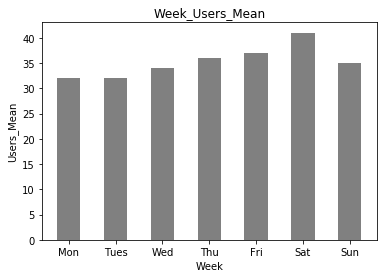

In [64]:
#요일 별 평균체류시간

x = ['Mon','Tues','Wed','Thu','Fri','Sat','Sun']
y = [32,32,34,36,37,41,35]
plt.xlabel('Week')
plt.ylabel('Users_Mean')
plt.title('Week_Users_Mean')
plt.bar(x,y,width = 0.5, color = "gray")
plt.show()